<a href="https://colab.research.google.com/github/chavi55/AI/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **군집화**

### K-means 알고리즘

K-means는 군집화에서 가장 일반적으로 사용되는 알고리즘이다. K-means는 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법이다.

군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택, 다시 중심점을 평균 지점으로 이동하는 프로세스를 반복적으로 수행한다.

모든 데이터 포인트에서 더 이상 중심점의 이동이 없을 경우 반복을 멈추고 해당 중심점에 속하는 데이터 포인트들을 군집화 하는 기법이다.

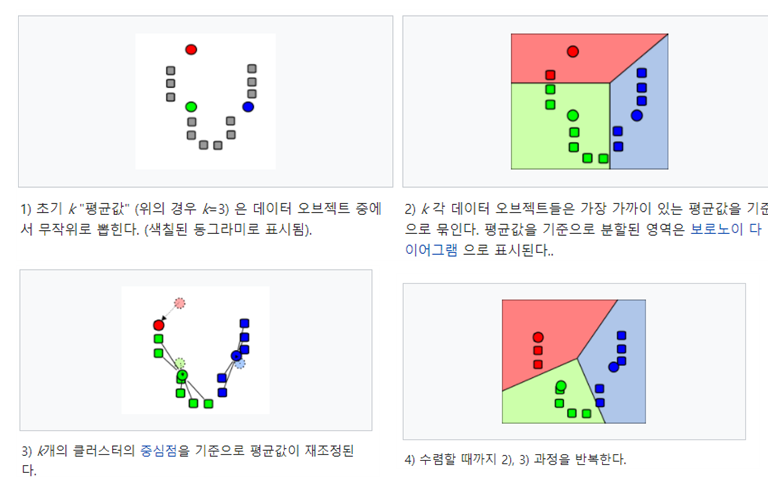

**K-means 의 특징**
* 일반적인 군집화에서 가장많이 활용 되는 알고리즘
* 알고리즘이 쉽고 간결
* 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화의 정확도가 떨어짐 -> PCA 고려
* 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
* 몇 개의 군집을 선택해야 할 지 스스로 판단해야함




### 사이킷런 KMeans

class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')

이 중 중요한 파라미터는 다음과 같다.

* n_clusters : 군집화 할 개수 (군집 중심점의 갯수)
* init : 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 임의로 중심을 설정하지 않고, 일반적으로 k-means++ 방식을 최초로 설정
* max_iter : 최대 반복 횟수, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

KMeans는 사이킷런의 비지도 학습 클래스와 마찬가지로 fit(데이터 셋) 또는 fit_transform(데이터 셋) 메서드를 이용해 수행하면 된다.

이렇게 수행된 KMeans 객체는 군집화 수행이 완료돼 군집화와 관련된 주요 속성을 알 수 있다.

* lables_ : 각 데이터 포인트가 속한 군집 중심점 레이블
* cluster_centers_ : 각 군집 중심점 좌표(Shape는 [군집개수, 피처개수])

### K-Means를 이용한 붓꽃(Iris) 데이터 셋 Clustering

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

#print(iris.DESCR)
#print(iris.data)
#print(iris.target)

# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환

irisDF = pd.DataFrame(data=iris.data, columns = iris.feature_names)
irisDF.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**KMeans 객체를 생성하고 군집화 수행**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(irisDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

**labels_ 속성을 통해 각 데이터 포인트별로 할당된 군집 중심점(Centroid)확인하고 irisDF에 'cluster' 컬럼으로 추가**

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


**실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지 확인해보자.**

DataFrame에 group by 연산을 실제 분류 값인 target과 군집화 분류 값인 cluster 레벨로 적용해 target과 cluster값 개수를 비교할 수 있다.

In [ ]:
print(iris.target)

irisDF['target']=iris.target # 정답
irisDF['cluster'] = kmeans.labels_ # Kmeans 알고리즘이 나눈 그룹 번호
#irisDF.head()
iris_result = irisDF.groupby(['target', 'cluster']).count()
print(iris_result)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
                sepal length (cm)  ...  petal width (cm)
target cluster                     ...                  
0      1                       50  ...                50
1      0                        2  ...                 2
       2                       48  ...                48
2      0                       36  ...                36
       2                       14  ...                14

[5 rows x 4 columns]


**2차원 평면에 데이터 포인트별로 군집화된 결과를 나타내기 위해 2차원 PCA값으로 각 데이터 차원축소**

2차원 평면에 개별 데이터의 군집화를 시각적으로 표현해야하는데, 붓꽃 데이터 셋 의 속성이 4개이므로 PCA를 이용해 차원축소한 뒤 X좌표, Y 좌표로 개별 데이터를 표현하자.

% PCA에 대한 참고 자료: https://m.blog.naver.com/tjdrud1323/221720259834

class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

* n_components : 분석할 주성분 개수

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_t = pca.fit_transform(iris.data)
print(pca_t.shape)

(150, 2)


In [ ]:
irisDF['pca_x'] = pca_t[:,0]
irisDF['pca_y'] = pca_t[:,1]
irisDF.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


산포도(scatter) 그래프 작성 방법 : https://kongdols-room.tistory.com/91

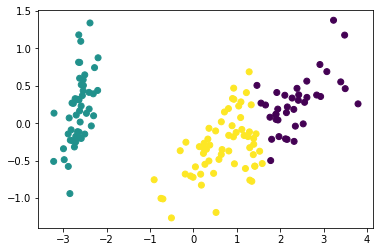

In [ ]:
plt.scatter(x=irisDF.loc[:, 'pca_x'], y = irisDF.loc[:, 'pca_y'], c = irisDF['cluster']) 

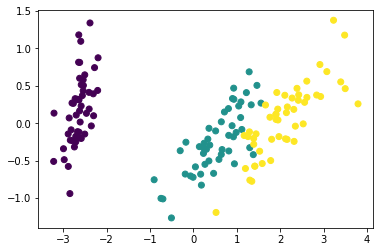

In [ ]:
plt.scatter(x = irisDF.loc[:, 'pca_x'],  y = irisDF.loc[:, 'pca_y'], c = irisDF['target']) #정답의 분포